In [ ]:
import glob
import json
import os

import IPython.display
import requests
from flask import make_response

import MediaIndexer
import MediaIndexer.redis_cache

# MediaIndexer Flask API

> *Flask-RESTful is an extension for Flask that adds support for quickly building REST APIs. It is a lightweight abstraction that works with your existing ORM/libraries*. - https://flask-restful.readthedocs.io/en/latest/

In [30]:
# Get the xxhash of a file path.
base_url = "http://127.0.0.1:5000"
urls = {
    "thumbnails": base_url + "/thumbnails/",
    "xxhash": base_url + "/api/xxhash",
    "exif": base_url + "/api/exif",
}


In [39]:
test_images = glob.glob("/tmp/darknet/data/*.jpg")


for test_image in test_images:
    break
print(test_image)


/tmp/darknet/data/giraffe.jpg


In [41]:
payload = {"path": test_image}
r = requests.get(url=urls["xxhash"], params=payload)
r


<Response [200]>

In [42]:
r.json()


{'path': '/tmp/darknet/data/giraffe.jpg', 'xxhash': '4901661b1a9c69e0'}

In [43]:
payload = {"path": test_image}
r = requests.get(url=urls["exif"], params=payload)
r


<Response [200]>

In [44]:
r.json()["exif"]


{'SourceFile': '/tmp/darknet/data/giraffe.jpg',
 'ExifTool:ExifToolVersion': 10.8,
 'File:FileName': 'giraffe.jpg',
 'File:Directory': '/tmp/darknet/data',
 'File:FileSize': 382965,
 'File:FileModifyDate': '2018:10:10 00:48:54-04:00',
 'File:FileAccessDate': '2018:10:10 05:43:05-04:00',
 'File:FileInodeChangeDate': '2018:10:10 00:48:54-04:00',
 'File:FilePermissions': 664,
 'File:FileType': 'JPEG',
 'File:FileTypeExtension': 'JPG',
 'File:MIMEType': 'image/jpeg',
 'File:ImageWidth': 500,
 'File:ImageHeight': 500,
 'File:EncodingProcess': 0,
 'File:BitsPerSample': 8,
 'File:ColorComponents': 3,
 'File:YCbCrSubSampling': '1 1',
 'JFIF:JFIFVersion': '1 1',
 'JFIF:ResolutionUnit': 1,
 'JFIF:XResolution': 300,
 'JFIF:YResolution': 300,
 'ICC_Profile:ProfileCMMType': 'Lino',
 'ICC_Profile:ProfileVersion': 528,
 'ICC_Profile:ProfileClass': 'mntr',
 'ICC_Profile:ColorSpaceData': 'RGB ',
 'ICC_Profile:ProfileConnectionSpace': 'XYZ ',
 'ICC_Profile:ProfileDateTime': '1998:02:09 06:49:00',
 'ICC_

In [49]:
payload = {"path": test_image}
r = requests.get(url=urls["thumbnails"], params=payload)
r


<Response [200]>

In [67]:
payload = {"path": test_image}
r = requests.get(url=urls["xxhash"], params=payload)
r


<Response [200]>

In [68]:
indexer = MediaIndexer.MediaIndexer(
    config_file=os.path.abspath("../config_m6700.ini")
)
indexer


MediaIndexer<config_m6700.ini>

In [69]:
media = MediaIndexer.IndexedMedia(file_path=test_image, indexer=indexer)


In [70]:
media


[X] hash : /tmp/darknet/data/giraffe.jpg


IndexedMedia<4901661b1a9c69e0>

In [71]:
media.exif


[X] hash : /tmp/darknet/data/giraffe.jpg
[X] EXIF : /tmp/darknet/data/giraffe.jpg


{'SourceFile': '/tmp/darknet/data/giraffe.jpg',
 'ExifTool:ExifToolVersion': 10.8,
 'File:FileName': 'giraffe.jpg',
 'File:Directory': '/tmp/darknet/data',
 'File:FileSize': 382965,
 'File:FileModifyDate': '2018:10:10 00:48:54-04:00',
 'File:FileAccessDate': '2018:10:10 05:43:05-04:00',
 'File:FileInodeChangeDate': '2018:10:10 00:48:54-04:00',
 'File:FilePermissions': 664,
 'File:FileType': 'JPEG',
 'File:FileTypeExtension': 'JPG',
 'File:MIMEType': 'image/jpeg',
 'File:ImageWidth': 500,
 'File:ImageHeight': 500,
 'File:EncodingProcess': 0,
 'File:BitsPerSample': 8,
 'File:ColorComponents': 3,
 'File:YCbCrSubSampling': '1 1',
 'JFIF:JFIFVersion': '1 1',
 'JFIF:ResolutionUnit': 1,
 'JFIF:XResolution': 300,
 'JFIF:YResolution': 300,
 'ICC_Profile:ProfileCMMType': 'Lino',
 'ICC_Profile:ProfileVersion': 528,
 'ICC_Profile:ProfileClass': 'mntr',
 'ICC_Profile:ColorSpaceData': 'RGB ',
 'ICC_Profile:ProfileConnectionSpace': 'XYZ ',
 'ICC_Profile:ProfileDateTime': '1998:02:09 06:49:00',
 'ICC_

[X] hash : /tmp/darknet/data/giraffe.jpg
[X] thumb : /tmp/darknet/data/giraffe.jpg


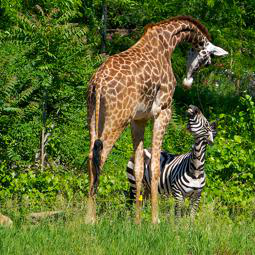

In [72]:
media.thumbnail


In [73]:
media.objects


Loading darknet classifier, one minute.
Loading network......Done
Loading metadata......Done


[Classified<giraffe, (160.8818817138672, 32.09965515136719, 436.2586212158203, 420.6363067626953)>,
 Classified<zebra, (251.98253631591797, 215.9030990600586, 422.1377639770508, 447.78372955322266)>]

In [74]:
media.xxhash


'4901661b1a9c69e0'

In [77]:
d = MediaIndexer.redis_cache._get_thumbnail(
    file_path="", file_hash=media.xxhash, databases=indexer.databases
)


[X] thumb : 


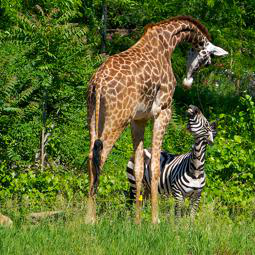

In [79]:
MediaIndexer.utils.pil_thumbnail(d)


In [81]:
d = MediaIndexer.redis_cache._get_exif(
    file_path="", file_hash=media.xxhash, databases=indexer.databases
)
d


[X] EXIF : 


{'SourceFile': '/tmp/darknet/data/giraffe.jpg',
 'ExifTool:ExifToolVersion': 10.8,
 'File:FileName': 'giraffe.jpg',
 'File:Directory': '/tmp/darknet/data',
 'File:FileSize': 382965,
 'File:FileModifyDate': '2018:10:10 00:48:54-04:00',
 'File:FileAccessDate': '2018:10:10 05:43:05-04:00',
 'File:FileInodeChangeDate': '2018:10:10 00:48:54-04:00',
 'File:FilePermissions': 664,
 'File:FileType': 'JPEG',
 'File:FileTypeExtension': 'JPG',
 'File:MIMEType': 'image/jpeg',
 'File:ImageWidth': 500,
 'File:ImageHeight': 500,
 'File:EncodingProcess': 0,
 'File:BitsPerSample': 8,
 'File:ColorComponents': 3,
 'File:YCbCrSubSampling': '1 1',
 'JFIF:JFIFVersion': '1 1',
 'JFIF:ResolutionUnit': 1,
 'JFIF:XResolution': 300,
 'JFIF:YResolution': 300,
 'ICC_Profile:ProfileCMMType': 'Lino',
 'ICC_Profile:ProfileVersion': 528,
 'ICC_Profile:ProfileClass': 'mntr',
 'ICC_Profile:ColorSpaceData': 'RGB ',
 'ICC_Profile:ProfileConnectionSpace': 'XYZ ',
 'ICC_Profile:ProfileDateTime': '1998:02:09 06:49:00',
 'ICC_

In [84]:
json.dumps(d)


'{"SourceFile": "/tmp/darknet/data/giraffe.jpg", "ExifTool:ExifToolVersion": 10.8, "File:FileName": "giraffe.jpg", "File:Directory": "/tmp/darknet/data", "File:FileSize": 382965, "File:FileModifyDate": "2018:10:10 00:48:54-04:00", "File:FileAccessDate": "2018:10:10 05:43:05-04:00", "File:FileInodeChangeDate": "2018:10:10 00:48:54-04:00", "File:FilePermissions": 664, "File:FileType": "JPEG", "File:FileTypeExtension": "JPG", "File:MIMEType": "image/jpeg", "File:ImageWidth": 500, "File:ImageHeight": 500, "File:EncodingProcess": 0, "File:BitsPerSample": 8, "File:ColorComponents": 3, "File:YCbCrSubSampling": "1 1", "JFIF:JFIFVersion": "1 1", "JFIF:ResolutionUnit": 1, "JFIF:XResolution": 300, "JFIF:YResolution": 300, "ICC_Profile:ProfileCMMType": "Lino", "ICC_Profile:ProfileVersion": 528, "ICC_Profile:ProfileClass": "mntr", "ICC_Profile:ColorSpaceData": "RGB ", "ICC_Profile:ProfileConnectionSpace": "XYZ ", "ICC_Profile:ProfileDateTime": "1998:02:09 06:49:00", "ICC_Profile:ProfileFileSignatur